# EQUIPMENT FAILURE FOR MAINTENACE 
  **ON SENSOR DATA**

## Abstract

Predictive maintenance plays a crucial role in various 
industries to ensure the reliability and efficiency of 
equipment. This paper presents a comprehensive 
methodology for predictive maintenance, leveraging 
advanced machine learning (ML) and deep learning 
techniques. The objective is to develop a predictive 
maintenance system capable of preemptively 
identifying equipment failures, thereby enabling 
proactive maintenance interventions. The methodology 
encompasses data collection, preprocessing, feature 
engineering, model selection, training, and 
deployment. Various tools and technologies such as 
Python programming language, TensorFlow, and cloud 
computing platforms are employed to enhance 
scalability and flexibility. The proposed framework is 
applicable across diverse domains, offering significant 
impacts such as reduced downtime, lower maintenance 
costs, and improved operational efficiency.

## Why we choosen this project ?

Predictive Maintenance (PdM) is an ML-based strategy that uses data to predict when an equipment failure might occur. 
This helps in identifying the potential issues with the equipment and what parts need to be fixed and when. 

Sensor data has become particularly important in PdM. This data is collected from smart sensors on manufacturing equipment, providing real-time information on device status. 

Sensor data can be sourced from various internal and external repositories, covering entire factories, transportation fleets, or infrastructure networks. This data is distributed via IoT sensor technology, highlighting the growing recognition of data's value in maintenance processes. 

In conclusion, PdM leverages ML and sensor data to optimize maintenance processes, resulting in cost savings, improved safety, and enhanced operational efficiency.

Predictive Maintenance: Examples and Use Cases 
- **Infrared Imagery (IR cameras)**: Hot spots of electric wiring
- **Acoustic Analysis**: Detecting gas and vacuum leaks
- **Vibration Analysis**: Determining the fluctuations of the vibration of essential components
- **Oil Analysis**: Checking the condition of a machine’s oil lubrication system

## Sensor Data Sources

We've explored various platforms for sensor data, including:

1. **Hugging Face**
2. **UC Irvine Machine Learning Repository**
3. **Google Datasets**
4. **Kaggle Predictive Maintenance**
5. **Kaggle Bosch Production Line Performance**
6. **Prognostics Data Repository**

After thorough research, We found the same sensor data on two platforms: **Hugging Face** and **UC Irvine Machine Learning Repository**.

## Sensor Data Details

The sensor data you found contains the following parameters:

- **Machine ID**: These are records of events reported by the machine.
- **Temperature**: This measures the heat generated by the machine.
- **Pressure Temperature**: This could be the temperature at which a certain pressure is maintained.
- **Rotational Speed**: This measures the number of rotations a machine part makes per unit time.
- **Torque**: This measures the force that causes the machine to rotate.
- **Tool Wear**: This indicates the extent of wear and tear on the machine tools.
- **Machine Failure**: This indicates whether the machine is failing or not.
- **Failing Component**: This identifies which component of the machine is failing.

This data can be crucial for predictive maintenance, performance analysis, and failure prevention in machinery.😊

## Importing the Important libraries

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## Loading Sensor Data

In [7]:
# Specify the path to your file
file_path = 'C:/Users/RAJNISH/OneDrive/Desktop/equipment Failure/Project/Equipment-Failure-on-Sensor-Data/SENSOR DATA/SensorData.csv'

# Use pandas to read the file
df = pd.read_csv(file_path)

## Anaysing First Five Rows

In [8]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [9]:
df.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,0,0,0,0,0


- Column contains 

1. **UDI**: Serial no.
2. **Product ID** - Equipment ID
3. **Type**: Type of Equipment
4. **Air Temperature**: in K
5. **Process Temperature**: in K
6. **Rotational Speed**: Revolutions per minute
7. **Torque**: in Newton meter
8. **tool wear**: minutes
9. **Machine Failure**: 0 or 1
10. **MWF, HDF, PWF, OSF, RNF** : MACHINE COMPONENS

## Checking Shape of Dataset

In [10]:
numberofrows_1, numberofcolumns_1 = df.shape
print('There are {} rows and {} columns'.format(numberofrows_1, numberofcolumns_1)+' in SensorData.')

There are 10000 rows and 14 columns in SensorData.


## Checking DataType

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

## Statistic Summary of Dataset

In [12]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


Here’s a brief overview of the DataFrame:

- Count: All columns have a count of 10,000, indicating there are no missing values.
- Mean: This row represents the average value for each column.
- Std: This row shows the standard deviation, which measures the amount of variation in each column.
- Min: This row shows the minimum value in each column.
- 25%: This is the first quartile, indicating that 25% of the data in each column is below this value.
- 50%: This is the median, indicating that 50% of the data in each column is below this value.
- 75%: This is the third quartile, indicating that 75% of the data in each column is below this value.
- Max: This row shows the maximum value in each column.

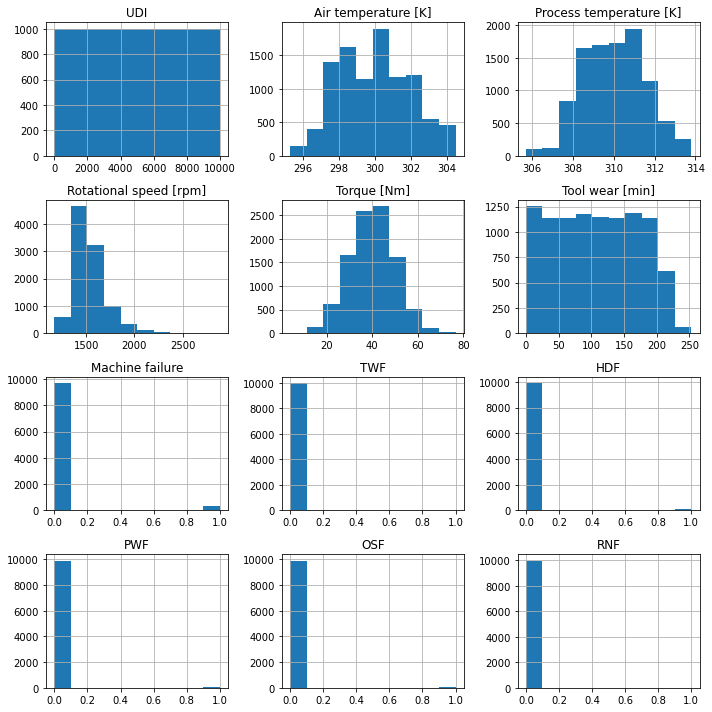

In [13]:
# Visualize the data
df.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

- Here's the brife observation of above :

In all graph, it shows the distribution of the data in each column.

## Checking Null Values

In [14]:
df.isnull()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

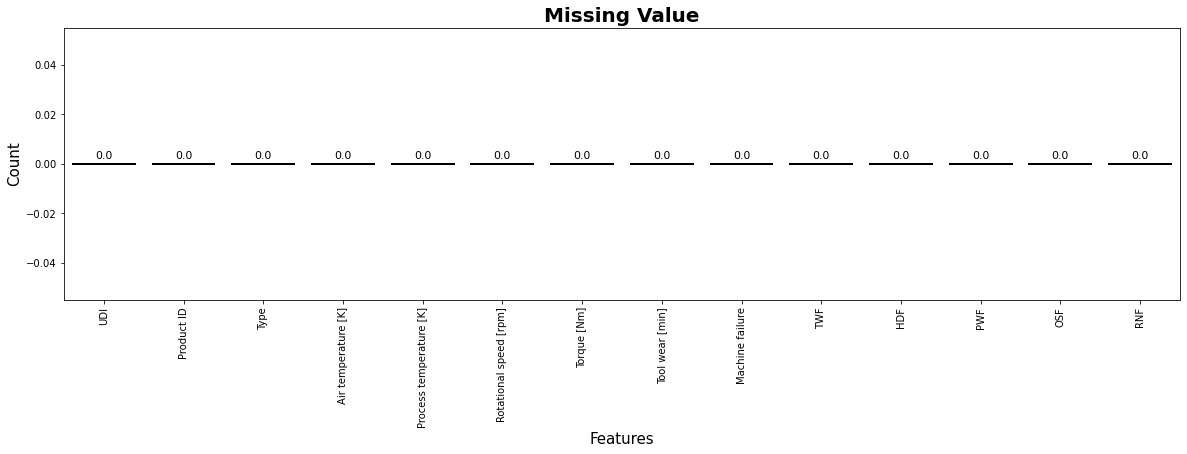

In [16]:
Value_Missing = df.isnull().sum().sort_values(ascending = False)
percent_missing = (df.isnull().sum() * 100 / len(df)).round(2).sort_values(ascending = False)
missing_data = pd.concat([Value_Missing, percent_missing], axis = 1, keys = ['Total', 'Percent'])
f, ax = plt.subplots(figsize = (20, 5))
plt.xticks(rotation = '90')
cplot = sns.barplot(x = missing_data.index, y = missing_data['Percent'], palette = 'bone_r', lw = 2, ec = 'black')
for count in cplot.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height),xy = (count.get_x() + count.get_width()/2, height),
                    ha = 'center', va = 'bottom', size = 11, xytext = (0,3), textcoords = 'offset points')
cplot.set_title('Missing Value', fontsize = 20, weight = 'bold')
cplot.set_ylabel('Count', fontsize = 15)
cplot.set_xlabel('Features', fontsize = 15);

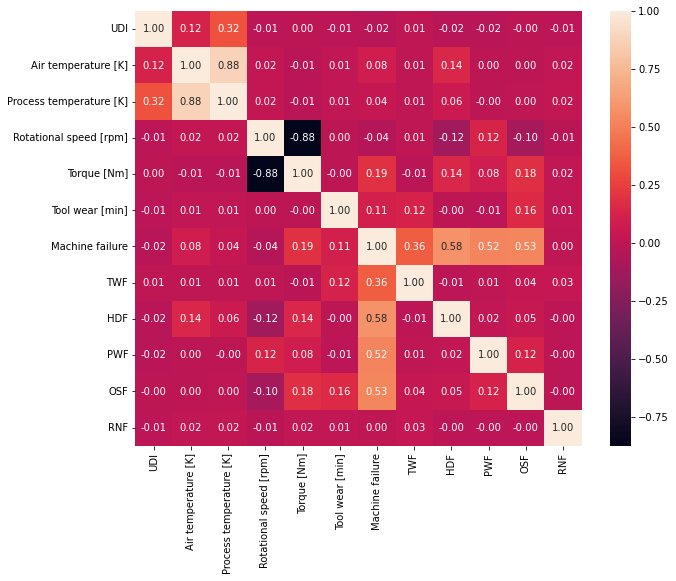

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
plt.figure(figsize=(10,8))
# Plot a heatmap of the correlation matrix
sns.heatmap(df.corr(), annot=True, fmt=".2f")
# Display the plot
plt.show()


<AxesSubplot:xlabel='Type', ylabel='count'>

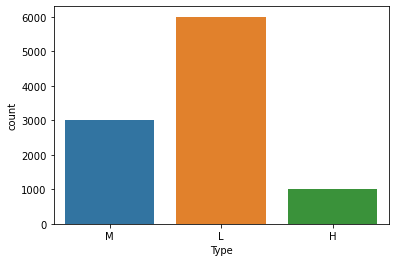

In [21]:
sns.countplot(x="Type", data=df)

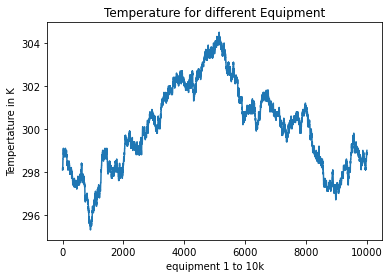

In [25]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'column_name' is the name of the column you want to plot
plt.plot(df['Air temperature [K]'])

plt.title('Temperature for different Equipment')
plt.xlabel('equipment 1 to 10k') 
plt.ylabel('Tempertature in K')

plt.show()


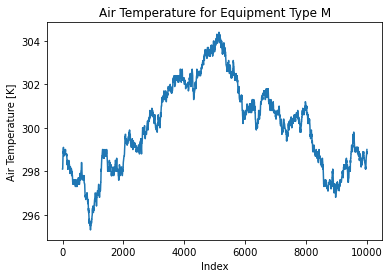

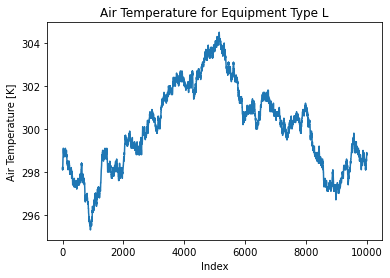

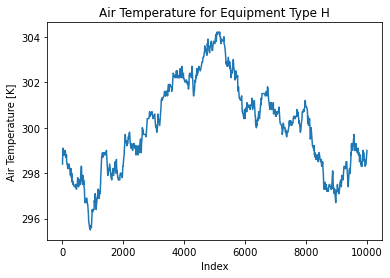

In [28]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Type' and 'Air temperature [K]' are the columns you want to plot

types = df['Type'].unique()

for equipment_type in types:
    subset = df[df['Type'] == equipment_type]
    plt.figure()  # create a new figure for each type
    plt.plot(subset['Air temperature [K]'])
    plt.title(f'Air Temperature for Equipment Type {equipment_type}')
    plt.xlabel('Index')
    plt.ylabel('Air Temperature [K]')
    plt.show()


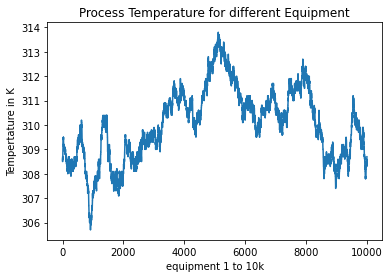

In [29]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'column_name' is the name of the column you want to plot
plt.plot(df['Process temperature [K]'])

plt.title('Process Temperature for different Equipment')
plt.xlabel('equipment 1 to 10k') 
plt.ylabel('Tempertature in K')

plt.show()


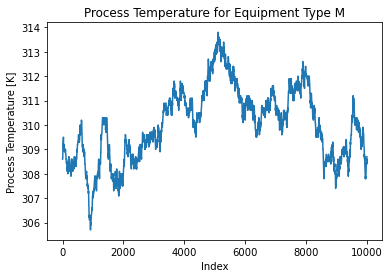

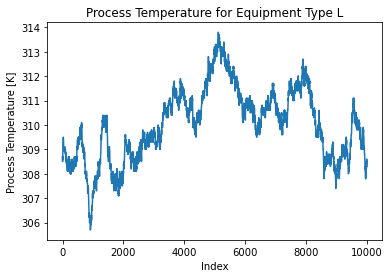

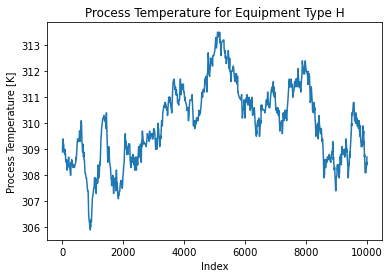

In [30]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Type' and 'Air temperature [K]' are the columns you want to plot

types = df['Type'].unique()

for equipment_type in types:
    subset = df[df['Type'] == equipment_type]
    plt.figure()  # create a new figure for each type
    plt.plot(subset['Process temperature [K]'])
    plt.title(f'Process Temperature for Equipment Type {equipment_type}')
    plt.xlabel('Index')
    plt.ylabel('Process Temperature [K]')
    plt.show()

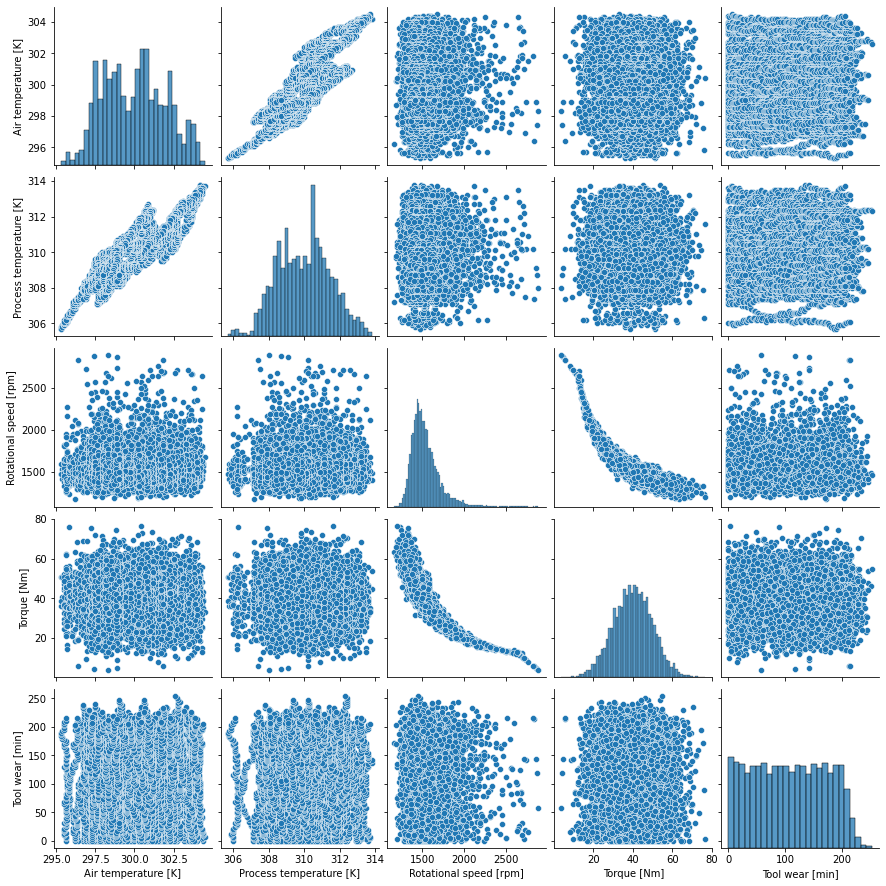

In [32]:
# Pairplot for selected features
selected_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
sns.pairplot(df[selected_features])
plt.show()

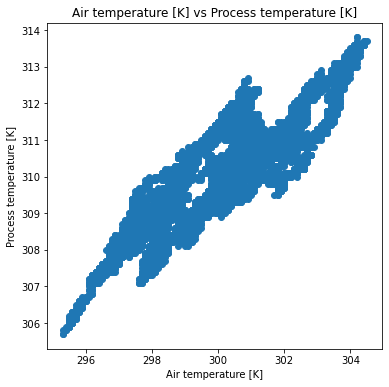

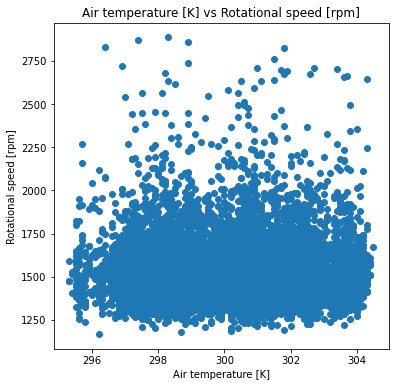

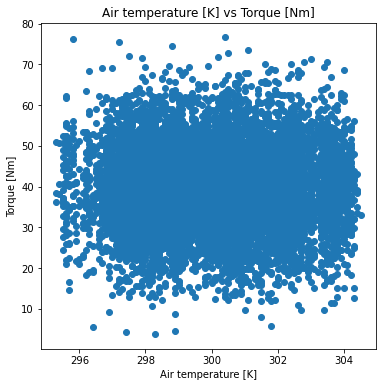

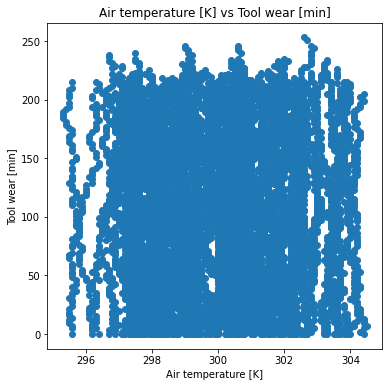

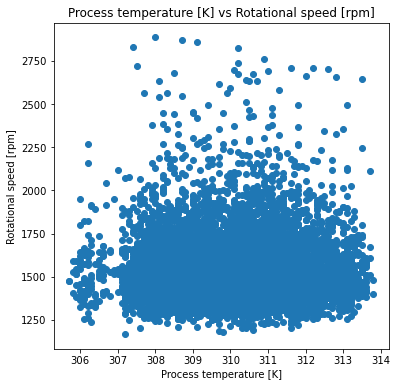

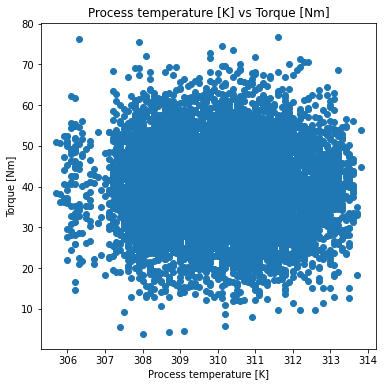

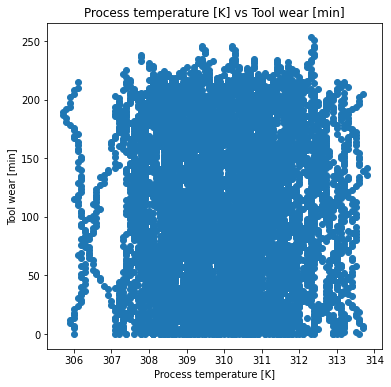

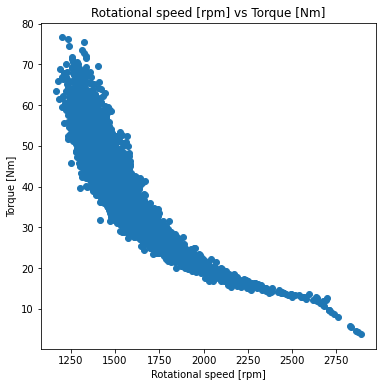

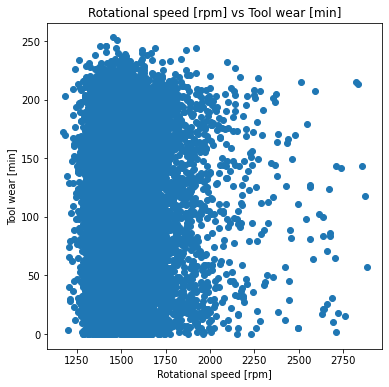

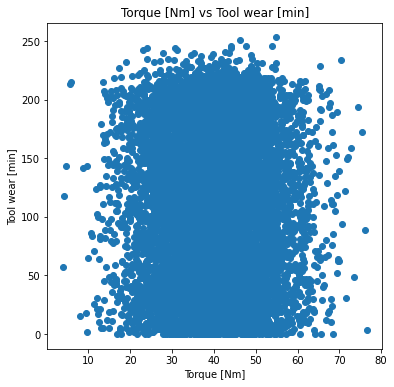

In [33]:
# Scatter plot for each pair of features
for i in range(len(selected_features)):
    for j in range(i+1, len(selected_features)):
        plt.figure(figsize=(6, 6))
        plt.scatter(df[selected_features[i]], df[selected_features[j]])
        plt.xlabel(selected_features[i])
        plt.ylabel(selected_features[j])
        plt.title(f'{selected_features[i]} vs {selected_features[j]}')
        plt.show()

In [34]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


- Here we find that in **Air temperature** and **Process temperature** columns temperature are in float so we convert it into int format 